In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 
import collections

In [2]:
df_unweighted = pd.read_csv('../combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [3]:
df_weighted = pd.read_csv('../combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [4]:
## Have all Jurisdiction from Susan's
jurisdiction_status_list = ['jurisdiction', 'intermediary_jurisdiction', 'officer_jurisdiction']

In [5]:
df_weighted_jur = df_weighted[df_weighted['status'].isin(jurisdiction_status_list)]
df_jur = df_weighted_jur.drop(['weight','status'], axis = 1)
df_jur

,node_start,node_end
0,Hong Kong,Samoa
1,Hong Kong,Samoa
2,Hong Kong,Samoa
3,Hong Kong,Samoa
4,Hong Kong,Samoa
...,...,...
221140,China,British Virgin Islands
221175,New Zealand,British Virgin Islands
221176,Cook Islands,British Virgin Islands
221177,Singapore,British Virgin Islands


In [6]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).size()
df_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Cook Islands,1
...,...,...,...
1293,Vietnam,Panama,1
1294,Yemen,Panama,1
1295,Zambia,British Virgin Islands,2
1296,Zimbabwe,British Virgin Islands,5


### Convert Data to an Undirected Edge List

In [7]:
#df_jur_grouped_list = df_jur_grouped.values.tolist()
#df_jur_grouped_list

In [8]:
#d = collections.defaultdict(int)
#for n1, n2, v in df_jur_grouped_list:
#    d[min(n1, n2), max(n1, n2)] += v
#result = [[k[0], k[1], v] for k, v in d.items()]

In [9]:
#df_net = pd.DataFrame(result)
#df_net

In [10]:
#df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
#df_net

In [11]:
#import df_net to csv later

In [12]:
#plot the unweighted graph (try unweighted first)
g = ig.Graph.TupleList(df_jur_grouped.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})


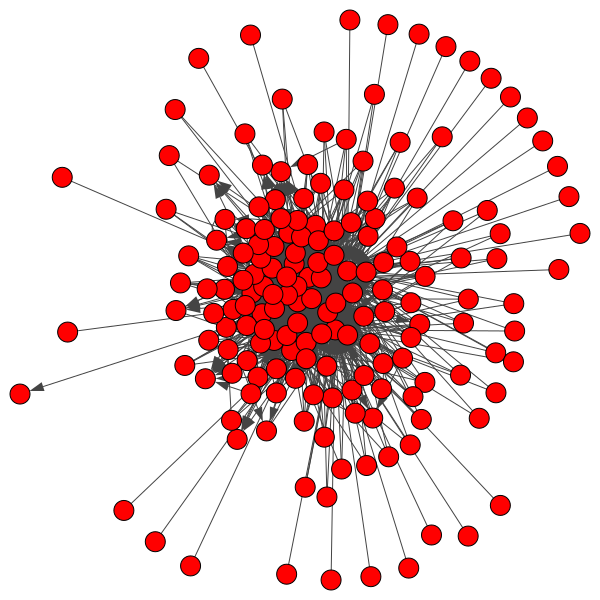

In [13]:
ig.plot(g)

In [14]:
g.diameter()

5

In [15]:
len(g.vs.indices)

175

In [16]:
#g.vs.indices
df_jur_grouped['node_start'].value_counts()

Cayman Islands               32
United States                27
United Kingdom               24
Switzerland                  23
Singapore                    21
                             ..
Albania                       1
Mongolia                      1
Iran                          1
Sint Maarten (Dutch part)     1
Guyana                        1
Name: node_start, Length: 169, dtype: int64

In [17]:
uni =df_jur_grouped['node_start'].unique()

In [18]:
len(uni)

169

In [19]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7f922c200c70>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7f922c200c70>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7f922c200c70>, 2, {'name': 'Andorra'}),
 igraph.Vertex(<igraph.Graph object at 0x7f922c200c70>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f922c200c70>, 4, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f922c200c70>, 5, {'name': 'Cook Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f922c200c70>, 6, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7f922c200c70>, 7, {'name': 'Hong Kong'}),
 igraph.Vertex(<igraph.Graph object at 0x7f922c200c70>, 8, {'name': 'Nevada'}),
 igraph.Vertex(<igraph.Graph object at 0x7f922c200c70>, 9, {'name': 'Niue'}),
 igraph.Vertex(<igraph.Graph object at 0x7f922c200c70>, 10, {'name': 'Panama'}),
 igraph.Vertex(<igraph.Graph object at 0x7f922c200c70>, 11, {'name': 'Samoa'}),
 

In [20]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'avg_betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [21]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    pr = []
    auth = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #try pagerank 
        page = g.pagerank(directed=True, weights='weight')
        page = sum(page)/max(len(page),1)
        pr.append(page)
        
        #authority score normalised by default
        kleinberg = g.authority_score(weights='weight')
        kleinberg = sum(kleinberg)/max(len(kleinberg),1)
        auth.append(kleinberg)
        
        #try in-degree
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'avg_weighted_betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
    return(df)

In [22]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,54.540230,0.01,5.0,-0.453080,7.448276,0.042806,2.158872
1,2,52.971098,0.01,5.0,-0.453601,7.410405,0.042835,2.149235
2,3,52.023256,0.02,5.0,-0.451261,7.430233,0.043199,2.146151
3,4,52.128655,0.02,5.0,-0.452733,7.385965,0.043193,2.148711
4,5,51.923529,0.03,5.0,-0.452726,7.423529,0.043668,2.144431


In [23]:
df_type1_unweighted.tail()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
170,171,0.0,0.87,0.0,NaN,0.0,0.0,NaN
171,172,0.0,0.88,0.0,NaN,0.0,0.0,NaN
172,173,0.0,0.88,0.0,NaN,0.0,0.0,NaN
173,174,0.0,0.89,0.0,NaN,0.0,0.0,NaN
174,175,0.0,0.89,NaN,NaN,0.0,NaN,NaN


In [24]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
0,1,0.01,32.0,98.879440,-0.452211,1174.580460,0.041848,0.005747,0.009466,2.161182
1,2,0.01,32.0,98.840621,-0.451616,1181.352601,0.042267,0.005780,0.009520,2.159644
2,3,0.02,32.0,98.981167,-0.454009,1185.366279,0.042320,0.005814,0.009575,2.161746
3,4,0.02,32.0,97.353558,-0.450841,1191.239766,0.042680,0.005848,0.009630,2.163402
4,5,0.03,32.0,97.495119,-0.451780,1197.105882,0.042768,0.005882,0.009687,2.165435


In [25]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
160,161,0.82,880.0,0.857143,-0.408248,73.642857,0.045918,0.071429,0.079223,1.631579
161,162,0.83,880.0,0.923077,-0.408248,79.307692,0.053254,0.076923,0.085317,1.631579
162,163,0.83,880.0,0.583333,-1.000000,77.416667,0.041667,0.083333,0.083333,1.538462
163,164,0.84,880.0,0.454545,-1.000000,84.363636,0.041322,0.090909,0.090909,1.500000
164,165,0.84,880.0,0.300000,-1.000000,92.700000,0.040000,0.100000,0.100000,1.428571
165,166,0.85,27.0,0.111111,NaN,3.000000,0.024691,0.111111,0.111111,1.333333
166,167,0.85,27.0,0.125000,NaN,3.375000,0.031250,0.125000,0.125000,1.333333
167,168,0.86,0.0,0.000000,NaN,0.000000,0.000000,0.142857,1.000000,NaN
168,169,0.86,0.0,0.000000,NaN,0.000000,0.000000,0.166667,1.000000,NaN
169,170,0.87,0.0,0.000000,NaN,0.000000,0.000000,0.200000,1.000000,NaN


### Targeted attack

In [26]:
##try sort by indegree 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'In_Degree':g.strength(mode='in',weights='weight')})

In [27]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='In_Degree',ascending=False)

In [28]:
temp_df.head(50)

,Node_indice,Nodes,In_Degree
3,3,British Virgin Islands,116692.0
10,10,Panama,42245.0
1,1,Bahamas,15536.0
12,12,Seychelles,14945.0
9,9,Niue,9456.0
11,11,Samoa,6459.0
23,23,British Anguilla,3240.0
18,18,Barbados,2361.0
16,16,Bermuda,2331.0
4,4,Cayman Islands,1453.0


In [29]:
temp_df.tail(50)

,Node_indice,Nodes,In_Degree
56,56,Canada,0.0
55,55,Cameroon,0.0
53,53,Brunei,0.0
75,75,Dominica,0.0
50,50,Brazil,0.0
49,49,Botswana,0.0
48,48,Bolivia,0.0
38,38,Belgium,0.0
37,37,Belarus,0.0
36,36,Bangladesh,0.0


In [30]:
#extract out by Node
order_of_del = temp_df['Nodes'].tolist()

In [31]:
#print the list to check it
order_of_del

['British Virgin Islands',
 'Panama',
 'Bahamas',
 'Seychelles',
 'Niue',
 'Samoa',
 'British Anguilla',
 'Barbados',
 'Bermuda',
 'Cayman Islands',
 'Nevada',
 'Hong Kong',
 'Labuan',
 'Cook Islands',
 'Isle of Man',
 'State of Delaware',
 'Malta',
 'Saint Kitts and Nevis',
 'Belize',
 'Singapore',
 'United Kingdom',
 'Cyprus',
 'Costa Rica',
 'United States',
 'Liechtenstein',
 'Uruguay',
 'Wyoming',
 'Jersey',
 'New Zealand',
 'Mauritius',
 'Guernsey',
 'Saint Vincent and the Grenadines',
 'Saint Lucia',
 'Netherlands',
 'Liberia',
 'Malaysia',
 'Marshall Islands',
 'Netherlands Antilles',
 'Antigua and Barbuda',
 'United Arab Emirates',
 'Grenada',
 'Vanuatu',
 'Turks and Caicos Islands',
 'US Virgin Islands',
 'Dubai',
 'Aruba',
 'Luxembourg',
 'Gibraltar',
 'Thailand',
 'Peru',
 'Mozambique',
 'Poland',
 'Pakistan',
 'Paraguay',
 'Namibia',
 'Philippines',
 'Oman',
 'Northern Mariana Islands',
 'Nicaragua',
 'Nigeria',
 'Norway',
 'Nauru',
 'Albania',
 'Morocco',
 'Montenegro',
 

In [32]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [33]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    pr = []
    auth = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #try pagerank 
        page = g.pagerank(directed=True, weights='weight')
        page = sum(page)/max(len(page),1)
        pr.append(page)
        #authority score normalised by default
        kleinberg = g.authority_score(weights='weight')
        kleinberg = sum(kleinberg)/max(len(kleinberg),1)
        auth.append(kleinberg)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
    return(df)

In [34]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,51.666667,5.0,-0.424345,6.494253,0.037323,2.215029
1,2,0.01,Panama,47.624277,5.0,-0.399495,5.687861,0.032878,2.250797
2,3,0.02,Bahamas,51.023256,6.0,-0.399878,5.075581,0.029509,2.391029
3,4,0.02,Seychelles,44.654971,6.0,-0.394677,4.561404,0.026675,2.354862
4,5,0.03,Niue,44.435294,6.0,-0.404222,4.188235,0.024637,2.371460


In [35]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
170,171,0.87,Fiji,0.0,0.0,NaN,0.0,0.0,NaN
171,172,0.88,Estonia,0.0,0.0,NaN,0.0,0.0,NaN
172,173,0.88,El Salvador,0.0,0.0,NaN,0.0,0.0,NaN
173,174,0.89,Egypt,0.0,0.0,NaN,0.0,0.0,NaN
174,175,0.89,Zimbabwe,0.0,NaN,NaN,0.0,NaN,NaN


In [36]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
0,1,0.01,British Virgin Islands,94.177466,33.0,-0.424345,579.534483,0.037323,0.005747,0.009940,2.215029
1,2,0.01,Panama,81.625771,141.0,-0.399495,310.456647,0.032878,0.005780,0.018338,2.250797
2,3,0.02,Bahamas,78.925175,141.0,-0.399878,225.505814,0.029509,0.005814,0.014490,2.391029
3,4,0.02,Seychelles,69.133727,141.0,-0.394677,147.409357,0.026675,0.005848,0.014152,2.354862
4,5,0.03,Niue,68.372193,141.0,-0.404222,102.352941,0.024637,0.005882,0.010355,2.371460
5,6,0.03,Samoa,66.701754,141.0,-0.415059,67.289941,0.022583,0.005917,0.013055,2.386416
6,7,0.04,British Anguilla,62.197995,141.0,-0.417391,50.315476,0.021010,0.005952,0.013459,2.341120
7,8,0.04,Barbados,52.513652,38.0,-0.404300,43.221557,0.018753,0.005988,0.011855,2.256481
8,9,0.05,Bermuda,48.590381,62.0,-0.383412,29.259036,0.016004,0.006024,0.010837,2.279685
9,10,0.05,Cayman Islands,34.710823,50.0,-0.250539,18.539394,0.012782,0.006061,0.006553,2.558046


In [37]:
df_type2_weighted.tail(150)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
25,26,0.13,Uruguay,0.281879,11.0,-0.186753,0.463087,0.001531,0.006711,0.007087,1.629032
26,27,0.14,Wyoming,0.155405,11.0,-0.234658,0.412162,0.001324,0.006757,0.006757,1.456522
27,28,0.14,Jersey,0.061224,9.0,-0.190554,0.312925,0.001064,0.006803,0.006803,1.275862
28,29,0.15,New Zealand,0.061644,3.0,0.157532,0.212329,0.000844,0.006849,0.009752,1.333333
29,30,0.15,Mauritius,0.048276,3.0,-0.228218,0.144828,0.000666,0.006897,0.006897,1.368421
...,...,...,...,...,...,...,...,...,...,...,...
170,171,0.87,Fiji,0.000000,0.0,NaN,0.000000,0.000000,0.250000,1.000000,NaN
171,172,0.88,Estonia,0.000000,0.0,NaN,0.000000,0.000000,0.333333,1.000000,NaN
172,173,0.88,El Salvador,0.000000,0.0,NaN,0.000000,0.000000,0.500000,1.000000,NaN
173,174,0.89,Egypt,0.000000,0.0,NaN,0.000000,0.000000,1.000000,1.000000,NaN


#### Unweighted

In [38]:
## Commented out to not confuse; use the weighted one below

#Try plotting unweighted

#fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
#ax2_1 = ax[0].twinx()
#ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
#ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
#ax[0].plot('prop_removed','avg_betweenness',data=df_type1_unweighted,ls='--',color='darkgreen')
#ax2_1.plot('prop_removed','avg_unweighted_indegree',data=df_type1_unweighted,ls='--',color='darkred')
#ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
#ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
#ax[0].legend(loc='upper right')
#ax[0].set_xlabel('Proportion of nodes removed')
#ax[0].set_title('Random deletion')
#ax2_1.tick_params('y',colors='darkred')
#ax2_1.set_ylabel('Avg inDegree')
#ax2_1.legend(loc='upper left')

#ax2_2 = ax[1].twinx()
#ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
#ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
#ax[1].plot('prop_removed','avg_betweenness',data=df_type2_unweighted,ls='--',color='green')
#ax2_2.plot('prop_removed','avg_unweighted_indegree',data=df_type2_unweighted,ls='--',color='red')
#ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
#ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
#ax[1].legend(loc='upper right')
#ax[1].set_xlabel('Proportion of nodes removed')
#ax[1].set_title('Targeted deletion')
#ax2_2.tick_params('y',colors='darkred')
#ax2_2.set_ylabel('Avg inDegree')
#ax2_2.legend(loc='upper left')
#plt.show()

#### Weighted

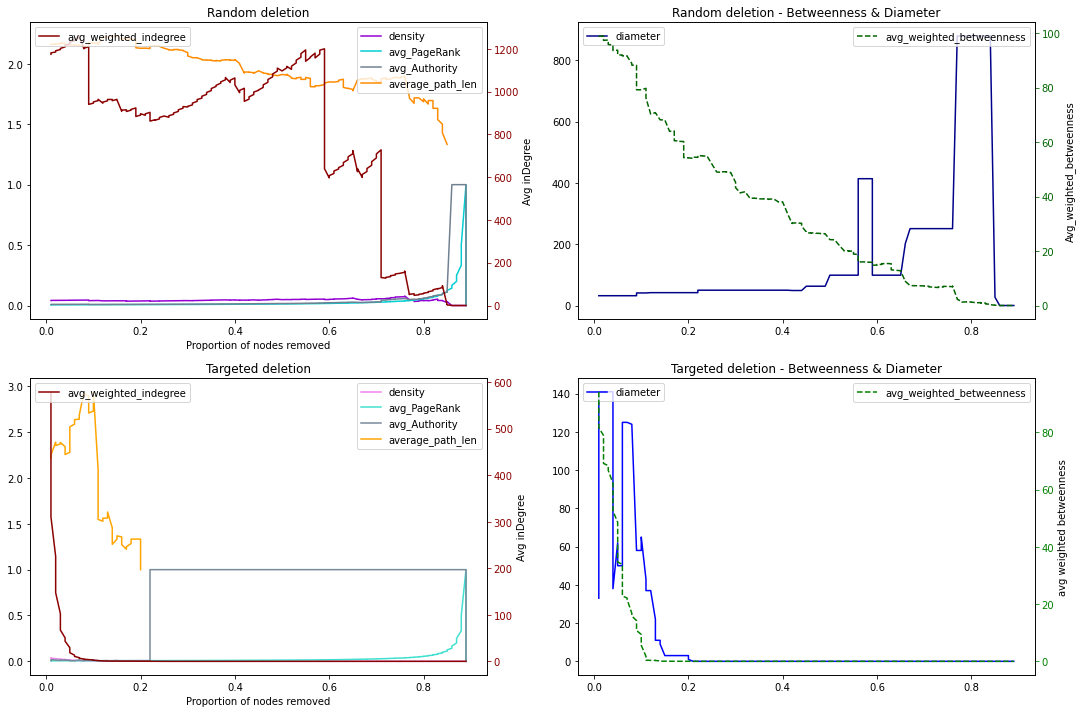

In [39]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(2,2,figsize=(18,12),sharey=False)

#Random attack LHS graphs

ax[0,1].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
ax[0,0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
#remove assortativity degree, replace with pagerank
ax[0,0].plot('prop_removed','avg_PageRank',data=df_type1_weighted,ls='-',color='darkturquoise')
#add in authority score
ax[0,0].plot('prop_removed','avg_Authority',data=df_type1_weighted,ls='-',color='slategray')
ax[0,0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlabel('Proportion of nodes removed')
ax[0,0].set_title('Random deletion')

ax2_1 = ax[0,0].twinx()
ax2_1.plot('prop_removed','avg_weighted_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

#Random attack RHS Graphs - Betweenness & Diameter
ax[0,1].set_title('Random deletion - Betweenness & Diameter')
ax[0,1].legend(loc='upper left')

ax_bet_rand = ax[0,1].twinx()
ax_bet_rand.plot('prop_removed','avg_weighted_betweenness',data=df_type1_weighted,ls='--',color='darkgreen')
ax_bet_rand.tick_params('y',colors='darkgreen')
ax_bet_rand.set_ylabel('Avg_weighted_betweenness')
ax_bet_rand.legend(loc='upper right')


#Targeted attack LHS Graphs

ax[1,1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[1,0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
#remove assortativity degree, replace with pagerank
ax[1,0].plot('prop_removed','avg_PageRank',data=df_type2_weighted,ls='-',color='turquoise')
# add in Authority
ax[1,0].plot('prop_removed','avg_Authority',data=df_type2_weighted,ls='-',color='lightslategray')
ax[1,0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Proportion of nodes removed')
ax[1,0].set_title('Targeted deletion')

ax2_2 = ax[1,0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1,1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1,1].legend(loc='upper left')

ax_bet_tar = ax[1,1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()

## Directd all jur

In [40]:
#because the g.es only shows the edge ID, we need to get the vertex source and target
##sv = source vertex 
##st = source target 
sv = []
st = []
for edge in g.es:
    source_vertex_id = edge.source
    target_vertex_id = edge.target
    source_vertex = g.vs[source_vertex_id]
    sv.append(source_vertex)
    target_vertex = g.vs[target_vertex_id]
    st.append(target_vertex)




In [41]:
##get name of source vertices. sv and st each is an igraph object so need to slice them to get the names

sv_name = []
for i in range(len(sv)):
    name = sv[i]['name']
    sv_name.append(name)
    
st_name = []
for i in range(len(st)):
    target_name = st[i]['name']
    st_name.append(target_name)
    

In [42]:
## new df with edges
edge_df = pd.DataFrame({'Edge_indice':g.es.indices,
                         'Edges_weight':g.es['weight'],
                         'Vertex_source':sv_name,
                         'Vertex_target':st_name})

In [43]:
##sort by descending weight
edge_df = edge_df.sort_values(by='Edges_weight',ascending=False)

In [44]:
edge_df.head(15)

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
520,520,28007,Hong Kong,British Virgin Islands
1094,1094,19749,Switzerland,British Virgin Islands
1105,1105,11590,Switzerland,Panama
647,647,10611,Jersey,British Virgin Islands
741,741,5584,Luxembourg,Panama
1207,1207,5539,United Kingdom,British Virgin Islands
883,883,4791,Panama,British Virgin Islands
495,495,4736,Guernsey,British Virgin Islands
1024,1024,4249,Singapore,British Virgin Islands
532,532,3754,Hong Kong,Seychelles


In [45]:
edge_deletelist = edge_df['Edge_indice'].tolist()

In [46]:
#Weighted on diameter
def Edges_weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    pr = []
    auth = []
    for i in range(len(g.es)):
        try:
            g.delete_edges(edge_deletelist[i])
        except:
            continue
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #try pagerank 
        page = g.pagerank(directed=True, weights='weight')
        page = sum(page)/max(len(page),1)
        pr.append(page)
        #authority score normalised by default
        kleinberg = g.authority_score(weights='weight')
        kleinberg = sum(kleinberg)/max(len(kleinberg),1)
        auth.append(kleinberg)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/len(edge_deletelist),2) #2840 is ttotal rows in df
        prop_removed.append(prop)
        node_removed.append(edge_deletelist[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
    return(df)

In [47]:
jur_all= Edges_weighted_Type2_targeted_del(g)

In [48]:
jur_all

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
0,1,0.00,520,100.611849,32.0,-0.456292,1091.114286,0.042351,0.005714,0.010756,2.161447
1,2,0.00,1094,100.611849,32.0,-0.456729,1090.874286,0.042318,0.005714,0.010749,2.162175
2,3,0.00,1105,100.611849,32.0,-0.457195,1081.548571,0.042286,0.005714,0.010439,2.162297
3,4,0.00,647,100.611849,32.0,-0.457412,1081.491429,0.042253,0.005714,0.010438,2.163146
4,5,0.00,741,100.611849,32.0,-0.457485,1073.371429,0.042220,0.005714,0.010375,2.163268
...,...,...,...,...,...,...,...,...,...,...,...
812,1245,0.96,429,104.049048,436.0,-0.325440,388.674286,0.015837,0.005714,0.006080,2.853492
813,1246,0.96,431,104.066190,436.0,-0.323932,388.657143,0.015804,0.005714,0.006080,2.853682
814,1247,0.96,432,104.066190,436.0,-0.327316,388.651429,0.015771,0.005714,0.006080,2.853682
815,1248,0.96,433,104.326190,436.0,-0.328826,388.640000,0.015739,0.005714,0.006080,2.859171


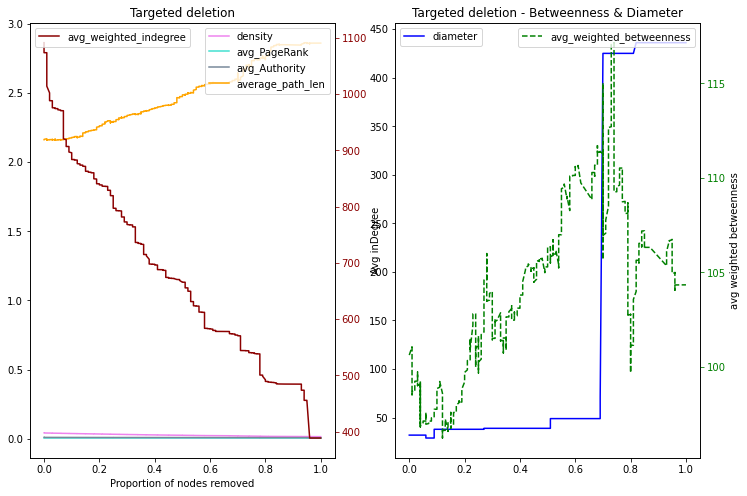

In [49]:
fig, ax = plt.subplots(1,2,figsize=(12,8),sharey=False)

#Targeted attack LHS Graphs

    
ax[0].plot('prop_removed','density',data=jur_all,ls='-',color='violet')
#remove assortativity degree, replace with pagerank
ax[0].plot('prop_removed','avg_PageRank',data=jur_all,ls='-',color='turquoise')
# add in Authority
ax[0].plot('prop_removed','avg_Authority',data=jur_all,ls='-',color='lightslategray')
ax[0].plot('prop_removed','average_path_len',data=jur_all,ls='-',color='orange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Targeted deletion')

ax2_2 = ax[0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=jur_all,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1].plot('prop_removed','diameter',data=jur_all,ls='-',color='blue')
ax[1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1].legend(loc='upper left')
    
    
ax_bet_tar = ax[1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=jur_all,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()